In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, ttest_ind

In [2]:
#import csv file
df = pd.read_csv('data/cleaned_data.csv')
df.head(1)

,Unnamed: 0,Unnamed: 0.1,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,Country Code,Days to trend
0,0,0,2kyS6SvSYSE,2017-11-14,22,2017-11-13,748374,57527,2966,15954,US,1 days 00:00:00.000000000


In [3]:
#drop columns I know I will not be looking at
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'trending_date', 'category_id', 'publish_time', 'Days to trend' ], axis=1)
df.head(1)

,video_id,views,likes,dislikes,comment_count,Country Code
0,2kyS6SvSYSE,748374,57527,2966,15954,US


In [4]:
#find the max values of views, likes, dislikes, and comments for each video_id
df = pd.DataFrame(df.groupby(['video_id']).max())
df.head(1)

,views,likes,dislikes,comment_count,Country Code
video_id,,,,,
--1skHapGUc,30914,483,77,81,MX


In [5]:
#create duplicate df to come back to if data gets messed up
df1 = df
df1.head(1)

,views,likes,dislikes,comment_count,Country Code
video_id,,,,,
--1skHapGUc,30914,483,77,81,MX


In [6]:
#df = df1
df1.head()

,views,likes,dislikes,comment_count,Country Code
video_id,,,,,
--1skHapGUc,30914,483,77,81,MX
--2K8l6BWfw,4822,694,4,34,FR
--45ws7CEN0,309197,3837,516,278,RU
--6vcer7XYQ,414012,2161,331,416,MX
--728h8mnDY,39535,2573,51,269,FR


In [7]:
#add column for total likes and dislikes
df['Total Likes and Dislikes'] = df['likes'] + df['dislikes']
df.head(1)

,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes
video_id,,,,,,
--1skHapGUc,30914,483,77,81,MX,560


In [8]:
#add column for percentage of likes among likes/dislikes
df['Likes/Dislikes Ratio'] = df['likes'] / df['dislikes']
df.head(1)

,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio
video_id,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727


In [9]:
#add column for how many views each video received per like/dislike, rounded to two digits
df['View per (dis)like'] = round(df['views'] / df['Total Likes and Dislikes'], 2)
df.head(3)

,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio,View per (dis)like
video_id,,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727,55.20
--2K8l6BWfw,4822,694,4,34,FR,698,173.500000,6.91
--45ws7CEN0,309197,3837,516,278,RU,4353,7.436047,71.03


In [13]:
#find outliers for number of views
views_q1 = np.percentile(df['views'], 25) #find lower and upper quartiles 
views_q3 = np.percentile(df['views'], 75)
views_qrange = (views_q3 - views_q1) #find interquartile range
views_lower =  views_q1 - (1.5 * views_qrange) #lower boundry
views_upper = views_q3 + (1.5 * views_qrange) #upper boundry
df['outliers'] = (df['views'] < views_lower) | (df['views'] > views_upper) #find outliers
df = df[df['outliers'] == False]
df.head(1)


,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio,View per (dis)like,outliers
video_id,,,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727,55.2,False


In [15]:
#find outliers for Likes/Dislikes ratio
ratio_q1 = np.percentile(df['Likes/Dislikes Ratio'], 25) #find lower and upper quartiles 
ratio_q3 = np.percentile(df['Likes/Dislikes Ratio'], 75)
ratio_qrange = (ratio_q3 - ratio_q1) #find interquartile range
ratio_lower =  ratio_q1 - (1.5 * ratio_qrange) #lower boundry
ratio_upper = ratio_q3 + (1.5 * ratio_qrange) #upper boundry
df['outliers'] = (df['Likes/Dislikes Ratio'] < ratio_lower) |(df['Likes/Dislikes Ratio'] > ratio_upper) #find outliers
df = df[df['outliers'] == False]
df.head(1)

/Users/jeremiahherberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio,View per (dis)like,outliers
video_id,,,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727,55.2,False


In [40]:
#pull random sample of 600 row index numbers of the df
random_index = np.random.uniform(low=0, high=(len(df) - 1), size=600) #find 600 random numbers
random_index1 = [] #round each number to 0 decimals 
for x in random_index: 
    b = round(x, 0)
    random_index1.append(b)
random_index = [] #clear original list
for x in random_index1: #convert list into integers
    random_index.append(int(x))
views = [] #crete empty lists for each category we will be charting
likes_ratio = []
view_per_like = []

for x in random_index: #for each random number in my list, pull the row index into a list
    views.append(df['views'][x])
    likes_ratio.append(df['Likes/Dislikes Ratio'][x])
    view_per_like.append(df['View per (dis)like'][x])


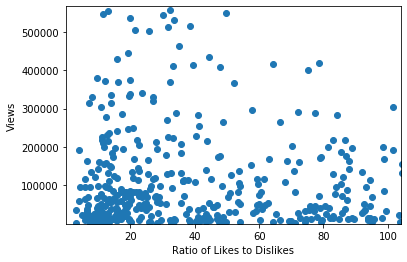

In [41]:
#create scatter plot comparing views to the ratio of likes to dislikes
plt.scatter(view_per_like, views)
plt.ylim(df['views'].min(), df['views'].max())
plt.xlim(df['Likes/Dislikes Ratio'].min(), df['Likes/Dislikes Ratio'].max())
plt.xlabel('Ratio of Likes to Dislikes')
plt.ylabel('Views')
plt.show()

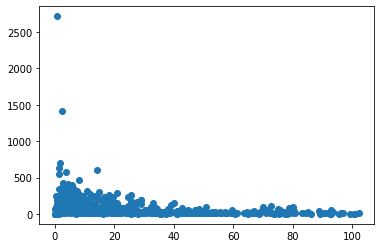

In [43]:
plt.scatter(likes_ratio, view_per_like)
plt.show()

In [25]:
len(df)

140907